# Lab: Understanding and Implementing Convolutional Neural Networks (CNNs)

### Definition and Basic Architecture

Convolutional Neural Networks (ConvNets) are a powerful type of deep learning model specifically designed for processing and analyzing visual data, such as images and videos. They have revolutionized the field of Computer Vision, enabling remarkable advancements in tasks like Image Recognition, Object Detection, and Image Segmentation.

The architecture of CNN comprises three fundamental layer types:

- Convolutional Layers

- Pooling Layers

- Fully-Connected Layers

<figure>
  <img style="float: left;" src="../../fig/cnn.png" width="500"/>
</figure>

#### Convolutional layer

The primary aim of convolutional layers in Convolutional Neural Networks (CNNs) is to extract features from input data, particularly images. These layers apply filters (or kernels) to the input, which allows the network to learn and identify patterns such as edges, textures, and more complex structures within the data, and the matrix formed by sliding the filter over the image is called the Convolved Feature, Activation Map, or Feature Map. 

It is primarily governed by the following main hyperparameters:

- Kernel size: It determines the size of the sliding window. It is generally recommended to use smaller window sizes, preferably odd values such as 1, 3, 5.

- Stride: The stride parameter determines the number of pixels the kernel window will move during each step of convolution. Typically, it is set to 1 to ensure that no locations are missed in an image. 

- Padding: Padding refers to the technique of adding zeros to the border of an image. By applying padding, the kernel can fully filter every position of an input image, ensuring that even the edges are properly processed. So its value is set to 0.

- Number of filters /Depth:  determines the number of distinct characteristics or elements that the convolutional layer will focus on detecting.


Let’s take an example to better understand this concept. Imagine we have an input image with dimensions of 6x6 pixels. For the convolutional operation, we use a kernel with dimensions of 3x3 pixels, a stride of 1, and no padding (padding of 0).

To calculate the output size of the convoluted image, we can apply the following formula: 

$$
\text{output\_size} = 1 + \frac{\text{input\_size} - \text{kernel\_size} + (2 \times \text{padding})}{\text{stride}}
$$
Plugging in the values, we get:  $\text{output\_size} = 1 + \frac{6 - 3 + (2 \times 0)}{1} = 4$

**How do you think we can convolve an image when the input has more than one channel (an RGB image)?**

you can learn more here: https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/


#### The Pooling Layer

Pooling layers, also referred to as downsampling, serve to reduce the dimensionality of the input, thereby decreasing the number of parameters. Similar to convolutional layers, pooling operations involve traversing a filter across the input. Two primary types of pooling are commonly employed:

- Max Pooling: It selects the pixel with the maximum value to send to the output array.

- Average pooling: It calculates the average value within the receptive field to send to the output array.

#### Fully-Connected Layer

The Fully Connected Layer or dense layer aims to provide global connectivity between all neurons in the layer. Unlike convolutional and pooling layers, which operate on local spatial regions, the fully connected layer connects every neuron to every neuron in the previous and subsequent layers.

This combination of convolution, pooling, and fully connected layers forms the core structure of a CNN and enables it to learn and recognize complex patterns in images or other data.

<figure>
  <img style="float: left;" src="../../fig/fully.png" width="700"/>
</figure>



#### Implementation

We will build a CNN to classify images from the MNIST dataset (handwritten digits, 0–9).

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data (scale pixel values between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (required for CNNs)
# CNNs expect the input image data to be in a specific format that includes 
# a channel dimension, even for grayscale images
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
x_test.shape

(10000, 28, 28, 1)

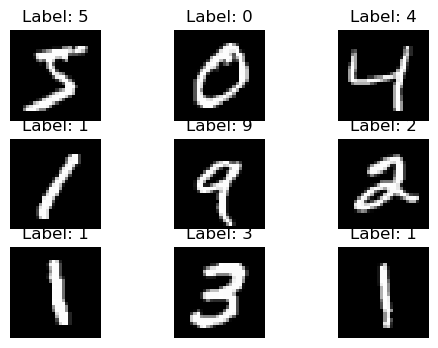

In [5]:
# Display a few training images
plt.figure(figsize=(6, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Label: {y_train[i].argmax()}')
    plt.axis('off')
plt.show()


In [6]:
# Define the CNN architecture
model = models.Sequential([
    # Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    # Add another Conv layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output
    layers.Flatten(),
    
    # Fully Connected Layer
    layers.Dense(128, activation='relu'),
    
    # Output Layer
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
])


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [8]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 22s 14ms/step - loss: 0.1494 - accuracy: 0.9543 - val_loss: 0.0537 - val_accuracy: 0.9842
Epoch 2/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0429 - val_accuracy: 0.9875
Epoch 3/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0314 - accuracy: 0.9895 - val_loss: 0.0418 - val_accuracy: 0.9885
Epoch 4/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0478 - val_accuracy: 0.9865
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0354 - val_accuracy: 0.9910


In [10]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


313/313 [==============================] - 3s 8ms/step - loss: 0.0313 - accuracy: 0.9900
Test Accuracy: 0.99


313/313 [==============================] - 1s 2ms/step


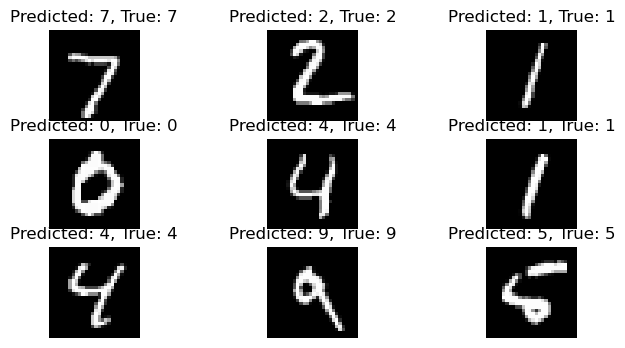

In [11]:
# Make predictions
predictions = model.predict(x_test)

# Display a few test images with predictions
plt.figure(figsize=(8, 4))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i].argmax()}')
    plt.axis('off')
plt.show()


## Assignment 2:

1- Modify the architecture to include more layers or filters. You could also change the optimizer. Observe how the performance changes.

2- Train a that modified model on a more complex dataset like CIFAR-10.
The CIFAR-10 (Canadian Institute for Advanced Research) dataset from keras is a collection of 60,000 32x32 color images categorized into 10 different classes. Each class contains 6,000 images, and the classes represent a wide range of objects.

## Image Recognition Using Pre-trained Models

will use a pre-trained deep learning model to recognize objects in an image. Pre-trained models like MobileNet, ResNet, or VGG are widely used for image recognition tasks. You will learn how to load such a model, process an input image, and make predictions.

Image recognition involves identifying objects or features in an image and classifying them into predefined categories

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


In [13]:
# Load the image
image = load_img('../../fig/cat.jpeg', target_size=(224, 224))  # MobileNet expects 224x224 images

# Convert the image to a numpy array
image_array = img_to_array(image)

# Expand dimensions to create a batch of size 1
image_batch = np.expand_dims(image_array, axis=0)

# Preprocess the image for MobileNet
image_preprocessed = preprocess_input(image_batch)


In [14]:
# Load the pre-trained MobileNetV2 model
model = mobilenet_v2.MobileNetV2(weights='imagenet')


In [15]:
# Predict the class probabilities
predictions = model.predict(image_preprocessed)

# Decode the top 3 predictions
decoded_predictions = decode_predictions(predictions, top=3)

# Display the results
print("Top 3 Predictions:")
for i, (imagenet_id, label, probability) in enumerate(decoded_predictions[0]):
    print(f"{i+1}: {label} ({probability*100:.2f}%)")


1/1 [==============================] - 1s 594ms/step
Top 3 Predictions:
1: tabby (68.19%)
2: tiger_cat (15.59%)
3: Egyptian_cat (7.13%)


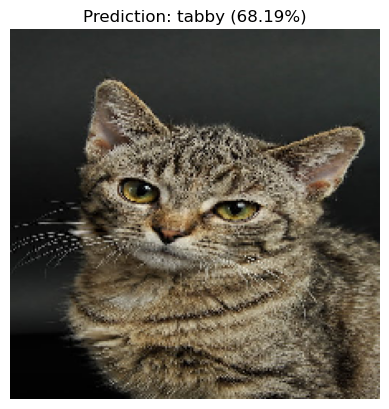

In [16]:
# Display the image with the top prediction
plt.imshow(image)
plt.title(f"Prediction: {decoded_predictions[0][0][1]} ({decoded_predictions[0][0][2]*100:.2f}%)")
plt.axis('off')
plt.show()


###  Image Detection Using OpenCV

 In this part, we will focus on detecting faces using Haar cascades, a fast method for object detection.

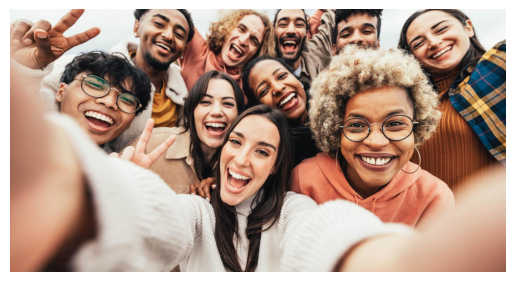

In [17]:
import cv2
import matplotlib.pyplot as plt

# Load the image
group = cv2.imread('../../fig/group.jpg')
group = cv2.cvtColor(group, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
group_image = cv2.cvtColor(group, cv2.COLOR_BGR2GRAY)
plt.imshow(group)
plt.axis('off')
plt.show()


In [18]:
# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(group_image, scaleFactor=1.1, minNeighbors=5)

# Print the number of faces detected
print(f"Number of faces detected: {len(faces)}")


Number of faces detected: 5


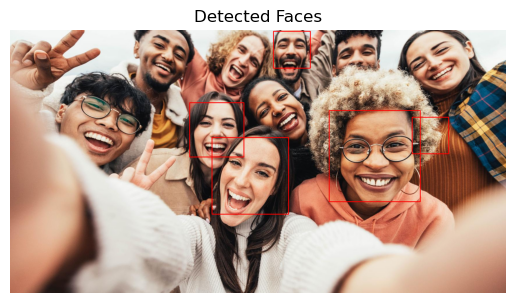

In [20]:
# Draw rectangles around each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(group, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue rectangles

# Display the result
plt.imshow(group)
plt.title("Detected Faces")
plt.axis('off')
plt.show()
